# **Tennis Match Prediction Poject using Neural Networks**

*Project will be uploaded on https://github.com/Developer-107*

*Data was fetched from https://github.com/JeffSackmann/tennis_atp repository*


#Imports

In [351]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Data Cleaning

## Merging all the data

In [352]:
# Taking all matches filtering and making one cleaned data

data = pd.read_csv(f'/content/drive/MyDrive/TennisMatchPredictionProject/atp_matches_1968.csv')
cleaned_matches_data = data[[ 'surface', 'draw_size',  'tourney_date', 'winner_id', 'loser_id', 'winner_hand', 'winner_ht', 'winner_age', 'loser_hand',
       'loser_ht', 'loser_age', 'best_of', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points']]

for n in range (1969, 2024):
  data1 = pd.read_csv(f'/content/drive/MyDrive/TennisMatchPredictionProject/atp_matches_{n}.csv')

  df1 = data1[[ 'surface', 'draw_size',  'tourney_date', 'winner_id', 'loser_id', 'winner_hand', 'winner_ht', 'winner_age', 'loser_hand',
       'loser_ht', 'loser_age', 'best_of', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points']]

  cleaned_matches_data = pd.concat([cleaned_matches_data, df1], ignore_index=True)


### Dropping dates and covnerting them in years

In [353]:
cleaned_matches_data['tourney_date'] = cleaned_matches_data['tourney_date'].astype(str)
cleaned_matches_data['year'] = cleaned_matches_data['tourney_date'].str[:4]
cleaned_matches_data.drop('tourney_date', axis=1, inplace=True)

In [354]:
cleaned_matches_data['year'] = pd.to_numeric(cleaned_matches_data['year'], errors='coerce')
cleaned_matches_data['decade'] = (cleaned_matches_data['year'] // 10) * 10

In [355]:
cleaned_matches_data

,surface,draw_size,winner_id,loser_id,winner_hand,winner_ht,winner_age,loser_hand,loser_ht,loser_age,best_of,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year,decade
0,Grass,32.0,112411,110196,U,NaN,NaN,U,NaN,24.0,3,NaN,NaN,NaN,NaN,1968,1960
1,Grass,32.0,126914,209536,R,NaN,NaN,U,NaN,NaN,3,NaN,NaN,NaN,NaN,1968,1960
2,Grass,32.0,209523,209535,U,NaN,NaN,U,NaN,NaN,3,NaN,NaN,NaN,NaN,1968,1960
3,Grass,32.0,100084,209534,R,178.0,24.3,U,NaN,NaN,3,NaN,NaN,NaN,NaN,1968,1960
4,Grass,32.0,100132,209533,R,NaN,21.3,U,NaN,NaN,3,NaN,NaN,NaN,NaN,1968,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191915,NaN,4.0,202335,209280,R,180.0,25.5,R,NaN,18.6,3,NaN,NaN,1717.0,1.0,2023,2020
191916,NaN,4.0,117365,109734,R,185.0,26.8,R,193.0,27.5,3,990.0,11.0,279.0,190.0,2023,2020
191917,NaN,4.0,121411,144949,R,178.0,30.0,R,183.0,23.9,3,364.0,131.0,894.0,15.0,2023,2020
191918,NaN,4.0,144949,144826,R,183.0,23.9,L,188.0,25.8,3,894.0,15.0,285.0,184.0,2023,2020


In [356]:
cleaned_matches_data.dropna(inplace=True)

In [357]:
cleaned_matches_data

,surface,draw_size,winner_id,loser_id,winner_hand,winner_ht,winner_age,loser_hand,loser_ht,loser_age,best_of,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year,decade
18919,Clay,32.0,100035,100088,R,185.0,34.5,R,180.0,29.4,3,74.0,0.0,102.0,0.0,1973,1970
18923,Clay,32.0,100282,100176,L,180.0,21.2,L,172.0,24.7,3,33.0,0.0,85.0,0.0,1973,1970
18925,Clay,32.0,100232,100054,R,170.0,22.7,R,173.0,32.6,3,28.0,0.0,103.0,0.0,1973,1970
18926,Clay,32.0,100437,100035,R,180.0,17.4,R,185.0,34.5,3,17.0,0.0,74.0,0.0,1973,1970
18929,Clay,32.0,100232,100038,R,170.0,22.7,R,178.0,34.1,3,28.0,0.0,79.0,0.0,1973,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191884,Clay,4.0,105641,208210,L,193.0,32.9,R,198.0,22.1,3,457.0,94.0,609.0,54.0,2023,2020
191885,Clay,4.0,105641,200270,L,193.0,32.9,R,193.0,25.7,3,457.0,94.0,486.0,85.0,2023,2020
191886,Clay,4.0,208210,210107,R,198.0,22.1,R,193.0,19.2,3,609.0,54.0,616.0,54.0,2023,2020
191887,Clay,4.0,105633,202378,R,180.0,32.9,R,178.0,24.1,3,463.0,93.0,828.0,24.0,2023,2020


In [358]:
# Create a list of the columns in the desired order
new_column_order = ['winner_id', 'loser_id', 'winner_rank_points', 'loser_rank_points', 'winner_rank', 'loser_rank', 'winner_ht', 'loser_ht', 'winner_hand', 'loser_hand', 'winner_age', 'loser_age', 'surface', 'best_of','draw_size', 'year', 'decade']

# Reorder the columns
cleaned_matches_data = cleaned_matches_data[new_column_order]

# Display the DataFrame with the new column order
display(cleaned_matches_data.head())

,winner_id,loser_id,winner_rank_points,loser_rank_points,winner_rank,loser_rank,winner_ht,loser_ht,winner_hand,loser_hand,winner_age,loser_age,surface,best_of,draw_size,year,decade
18919,100035,100088,0.0,0.0,74.0,102.0,185.0,180.0,R,R,34.5,29.4,Clay,3,32.0,1973,1970
18923,100282,100176,0.0,0.0,33.0,85.0,180.0,172.0,L,L,21.2,24.7,Clay,3,32.0,1973,1970
18925,100232,100054,0.0,0.0,28.0,103.0,170.0,173.0,R,R,22.7,32.6,Clay,3,32.0,1973,1970
18926,100437,100035,0.0,0.0,17.0,74.0,180.0,185.0,R,R,17.4,34.5,Clay,3,32.0,1973,1970
18929,100232,100038,0.0,0.0,28.0,79.0,170.0,178.0,R,R,22.7,34.1,Clay,3,32.0,1973,1970


In [359]:
# Encode the 'surface' column
cleaned_matches_data['surface'] = cleaned_matches_data['surface'].replace({'Hard': 4, 'Clay': 3, 'Grass': 2, 'Carpet': 1})

# Replace 'R' and 'L' with 1 and 0, and 'A' with 2
cleaned_matches_data['winner_hand'] = cleaned_matches_data['winner_hand'].replace({'R': 1, 'L': 0, 'A': 2})
cleaned_matches_data['loser_hand'] = cleaned_matches_data['loser_hand'].replace({'R': 1, 'L': 0, 'A': 2})

# Remove rows where either hand is 'U'
cleaned_matches_data = cleaned_matches_data[cleaned_matches_data['winner_hand'] != 'U']
cleaned_matches_data = cleaned_matches_data[cleaned_matches_data['loser_hand'] != 'U']

# Convert to integer type
cleaned_matches_data['winner_hand'] = cleaned_matches_data['winner_hand'].astype(int)
cleaned_matches_data['loser_hand'] = cleaned_matches_data['loser_hand'].astype(int)

display(cleaned_matches_data.head())

/tmp/ipython-input-1412988991.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_matches_data['surface'] = cleaned_matches_data['surface'].replace({'Hard': 4, 'Clay': 3, 'Grass': 2, 'Carpet': 1})


,winner_id,loser_id,winner_rank_points,loser_rank_points,winner_rank,loser_rank,winner_ht,loser_ht,winner_hand,loser_hand,winner_age,loser_age,surface,best_of,draw_size,year,decade
18919,100035,100088,0.0,0.0,74.0,102.0,185.0,180.0,1,1,34.5,29.4,3,3,32.0,1973,1970
18923,100282,100176,0.0,0.0,33.0,85.0,180.0,172.0,0,0,21.2,24.7,3,3,32.0,1973,1970
18925,100232,100054,0.0,0.0,28.0,103.0,170.0,173.0,1,1,22.7,32.6,3,3,32.0,1973,1970
18926,100437,100035,0.0,0.0,17.0,74.0,180.0,185.0,1,1,17.4,34.5,3,3,32.0,1973,1970
18929,100232,100038,0.0,0.0,28.0,79.0,170.0,178.0,1,1,22.7,34.1,3,3,32.0,1973,1970


In [360]:
cleaned_matches_data['rank_difference'] = cleaned_matches_data['winner_rank'] - cleaned_matches_data['loser_rank']
cleaned_matches_data['rank_points_difference'] = cleaned_matches_data['winner_rank_points'] - cleaned_matches_data['loser_rank_points']
cleaned_matches_data['height_difference'] = cleaned_matches_data['winner_ht'] - cleaned_matches_data['loser_ht']
cleaned_matches_data['age_difference'] = cleaned_matches_data['winner_age'] - cleaned_matches_data['loser_age']
cleaned_matches_data['hand_difference'] = cleaned_matches_data['winner_hand'] - cleaned_matches_data['loser_hand']

display(cleaned_matches_data.head())

,winner_id,loser_id,winner_rank_points,loser_rank_points,winner_rank,loser_rank,winner_ht,loser_ht,winner_hand,loser_hand,winner_age,loser_age,surface,best_of,draw_size,year,decade,rank_difference,rank_points_difference,height_difference,age_difference,hand_difference
18919,100035,100088,0.0,0.0,74.0,102.0,185.0,180.0,1,1,34.5,29.4,3,3,32.0,1973,1970,-28.0,0.0,5.0,5.1,0
18923,100282,100176,0.0,0.0,33.0,85.0,180.0,172.0,0,0,21.2,24.7,3,3,32.0,1973,1970,-52.0,0.0,8.0,-3.5,0
18925,100232,100054,0.0,0.0,28.0,103.0,170.0,173.0,1,1,22.7,32.6,3,3,32.0,1973,1970,-75.0,0.0,-3.0,-9.9,0
18926,100437,100035,0.0,0.0,17.0,74.0,180.0,185.0,1,1,17.4,34.5,3,3,32.0,1973,1970,-57.0,0.0,-5.0,-17.1,0
18929,100232,100038,0.0,0.0,28.0,79.0,170.0,178.0,1,1,22.7,34.1,3,3,32.0,1973,1970,-51.0,0.0,-8.0,-11.4,0


In [361]:
# Drop the original columns
cleaned_matches_data = cleaned_matches_data.drop(columns=['winner_rank', 'loser_rank', 'winner_rank_points', 'loser_rank_points', 'winner_ht', 'loser_ht', 'winner_age', 'loser_age', 'winner_hand', 'loser_hand'])

# Display the first few rows of the updated DataFrame
display(cleaned_matches_data.head())

,winner_id,loser_id,surface,best_of,draw_size,year,decade,rank_difference,rank_points_difference,height_difference,age_difference,hand_difference
18919,100035,100088,3,3,32.0,1973,1970,-28.0,0.0,5.0,5.1,0
18923,100282,100176,3,3,32.0,1973,1970,-52.0,0.0,8.0,-3.5,0
18925,100232,100054,3,3,32.0,1973,1970,-75.0,0.0,-3.0,-9.9,0
18926,100437,100035,3,3,32.0,1973,1970,-57.0,0.0,-5.0,-17.1,0
18929,100232,100038,3,3,32.0,1973,1970,-51.0,0.0,-8.0,-11.4,0


In [362]:
cleaned_matches_data.tail()

,winner_id,loser_id,surface,best_of,draw_size,year,decade,rank_difference,rank_points_difference,height_difference,age_difference,hand_difference
191884,105641,208210,3,3,4.0,2023,2020,-152.0,40.0,-5.0,10.8,-1
191885,105641,200270,3,3,4.0,2023,2020,-29.0,9.0,0.0,7.2,-1
191886,208210,210107,3,3,4.0,2023,2020,-7.0,0.0,5.0,2.9,0
191887,105633,202378,3,3,4.0,2023,2020,-365.0,69.0,2.0,8.8,0
191888,105747,208364,3,3,4.0,2023,2020,47.0,-7.0,-10.0,8.9,1


In [363]:
cleaned_matches_data = cleaned_matches_data.drop(columns=['decade'])

display(cleaned_matches_data.head())

,winner_id,loser_id,surface,best_of,draw_size,year,rank_difference,rank_points_difference,height_difference,age_difference,hand_difference
18919,100035,100088,3,3,32.0,1973,-28.0,0.0,5.0,5.1,0
18923,100282,100176,3,3,32.0,1973,-52.0,0.0,8.0,-3.5,0
18925,100232,100054,3,3,32.0,1973,-75.0,0.0,-3.0,-9.9,0
18926,100437,100035,3,3,32.0,1973,-57.0,0.0,-5.0,-17.1,0
18929,100232,100038,3,3,32.0,1973,-51.0,0.0,-8.0,-11.4,0


In [364]:
# Rename the columns
cleaned_matches_data = cleaned_matches_data.rename(columns={'winner_id': 'player_1', 'loser_id': 'player_2'})

# Reorder the columns
new_column_order = ['player_1', 'player_2', 'rank_points_difference', 'rank_difference', 'age_difference', 'height_difference', 'hand_difference', 'best_of', 'draw_size', 'surface', 'year']
cleaned_matches_data = cleaned_matches_data[new_column_order]


#Swapping data

In [365]:
# Create the target variable 'winner'
cleaned_matches_data['winner'] = 1

# Get the indices of the rows to swap
swap_indices = np.random.choice(
    cleaned_matches_data.index,
    size=len(cleaned_matches_data) // 2,
    replace=False
)

# Swap player_1 and player_2 for the selected indices
# Also, update the 'winner' column to 0 for these rows
temp_player_1 = cleaned_matches_data.loc[swap_indices, 'player_1'].copy()
cleaned_matches_data.loc[swap_indices, 'player_1'] = cleaned_matches_data.loc[swap_indices, 'player_2']
cleaned_matches_data.loc[swap_indices, 'player_2'] = temp_player_1
cleaned_matches_data.loc[swap_indices, 'winner'] = 0

# Also, we need to flip the signs of the difference columns for the swapped rows
for col in ['rank_points_difference', 'rank_difference', 'age_difference', 'height_difference', 'hand_difference']:
    cleaned_matches_data.loc[swap_indices, col] = -cleaned_matches_data.loc[swap_indices, col]



display(cleaned_matches_data.head())

,player_1,player_2,rank_points_difference,rank_difference,age_difference,height_difference,hand_difference,best_of,draw_size,surface,year,winner
18919,100088,100035,-0.0,28.0,-5.1,-5.0,0,3,32.0,3,1973,0
18923,100282,100176,0.0,-52.0,-3.5,8.0,0,3,32.0,3,1973,1
18925,100232,100054,0.0,-75.0,-9.9,-3.0,0,3,32.0,3,1973,1
18926,100437,100035,0.0,-57.0,-17.1,-5.0,0,3,32.0,3,1973,1
18929,100038,100232,-0.0,51.0,11.4,8.0,0,3,32.0,3,1973,0


# Splitting data and starting training

In [366]:

# Define our features (X) and target (y)
X = cleaned_matches_data.drop(['player_1', 'player_2', 'winner', 'year'], axis=1)
y = cleaned_matches_data['winner']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the new dataframes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (82140, 8)
X_test shape: (20535, 8)
y_train shape: (82140,)
y_test shape: (20535,)


In [367]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1315/1315 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5923 - loss: 2.9809 - val_accuracy: 0.6463 - val_loss: 0.6442
Epoch 2/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6351 - loss: 0.6551 - val_accuracy: 0.6474 - val_loss: 0.6434
Epoch 3/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6422 - loss: 0.6432 - val_accuracy: 0.6476 - val_loss: 0.6400
Epoch 4/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6409 - loss: 0.6427 - val_accuracy: 0.6482 - val_loss: 0.6382
Epoch 5/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6371 - loss: 0.6480 - val_accuracy: 0.6502 - val_loss: 0.6359
Epoch 6/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6403 - loss: 0.6421 - val_accuracy: 0.6518 - val_loss: 0.6287
Epoch 7/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6405 - loss: 0.6420 - val_accuracy: 0.6505 - val_loss: 0.6277
Epoch 8/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6433 - loss: 0.6388 - val

642/642 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6537 - loss: 0.6227
Test accuracy: 0.6521061658859253


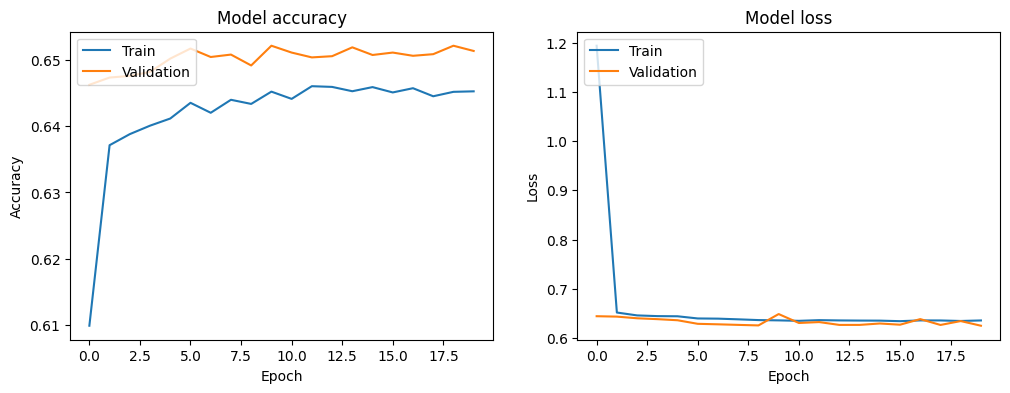

In [368]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()